## Importing Required Libraries

In [70]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

## Reading dataset

In [71]:
data = pd.read_csv("dataset.csv")
data.head(10)

,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch
5,エノが行きがかりでバスに乗ってしまい、気分が悪くなった際に助けるが、今すぐバスを降りたいと運...,Japanese
6,tsutinalar i̇ngilizce tsuutina kanadada albert...,Turkish
7,müller mox figura centralis circulorum doctoru...,Latin
8,برقی بار electric charge تمام زیرجوہری ذرات کی...,Urdu
9,シャーリー・フィールドは、サン・ベルナルド・アベニュー沿い市民センターとrtマーティン高校に...,Japanese


## Shape of the dataset

In [72]:
data.shape

(22000, 2)

## Info

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      22000 non-null  object
 1   language  22000 non-null  object
dtypes: object(2)
memory usage: 343.9+ KB


# Data Preproessing

## Splitting X and Y

In [74]:
X = data["Text"]
y = data["language"]

## Encoding Y

Machine learning models can only work with numerical values. For this reason, it is necessary to transform the categorical values of the relevant features into numerical ones. This process is called feature encoding.

Here, we are encoding all languages(y) to numerical values to feed into our ML model.

In [75]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [76]:
print(np.unique(y))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]


In [77]:
print(len(np.unique(y)))

22


## Cleaning and Lowering Text

In [80]:
def cleanLower(texts):
    pattern = "^[a-zA-Z]"
    cleanText = []
    for text in texts:
        # re.sub(pattern) means replace everything with a space except alphabetical characters
        cleanText.append(re.sub(pattern," ",text).lower())
        
    return cleanText

X = cleanLower(X)
X[:10]

[' lement gottwaldi surnukeha palsameeriti ning paigutati mausoleumi surnukeha oli aga liiga hilja ja oskamatult palsameeritud ning hakkas ilmutama lagunemise tundemärke  aastal viidi ta surnukeha mausoleumist ära ja kremeeriti zlíni linn kandis aastatel – nime gottwaldov ukrainas harkivi oblastis kandis zmiivi linn aastatel – nime gotvald',
 ' ebes joseph pereira thomas  på eng the jesuits and the sino-russian treaty of nerchinsk  the diary of thomas pereira bibliotheca instituti historici s i --   rome libris ',
 'ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เริ่มตั้งแต่ถนนสนามไชยถึงแม่น้ำเจ้าพระยาที่ถนนตก กรุงเทพมหานคร เป็นถนนรุ่นแรกที่ใช้เทคนิคการสร้างแบบตะวันตก ปัจจุบันผ่านพื้นที่เขตพระนคร เขตป้อมปราบศัตรูพ่าย เขตสัมพันธวงศ์ เขตบางรัก เขตสาทร และเขตบางคอแหลม',
 'விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திரிகை-விசாகப்பட்டின ஆசிரியர் சம்பத்துடன் இணைந்து விரிவுபடுத்தினார்  ஆண்டுகள் தொடர்ந்து செயலராக இருந்து தமிழ்மன்றத்தை நடத்திச் சென்றார்  கோவை செம்மொழி மாநாட்டில் "தமிழ்ச்சங்கங்களு

In [81]:
len(X)

22000

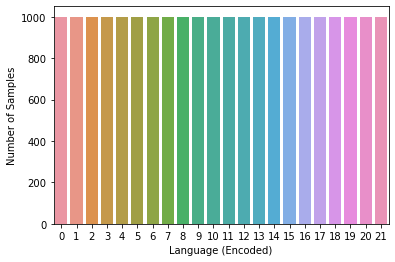

In [82]:
plt.subplots(figsize=(6,4))
sns.countplot(y)
plt.xlabel("Language (Encoded)")
plt.ylabel("Number of Samples")
plt.show()

## Extracting Features using Bag of Words

In order to ensure machine deal with texts we use text feature extracting methods. In this kernel we'll use the most primitive one, Bag of Words

In bag of words method, each text will be a vector. And each feature will be a word. Let's make an example

| TEXTS     | I   | AM  | GOOD | ARE | YOU  | WE | LIKE | MEAT |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | 
| I AM GOOD | 1   | 1   | 1    |  0 |  0 |  0  |  0  |  0  |
| ARE YOU GOOD  |  0 |  0  |  1 |   1 |  1 |  0  |  0 |  0 |
| WE LIKE MEAT  | 0 |  0  |  0  |  0  | 0 | 1  |  1  | 1 |

In [83]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=10000)
X = cv.fit_transform(X)
X.shape

(22000, 10000)

In [10]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [11]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [12]:
y_pred = model.predict(x_test)

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy is :",ac)

Accuracy is : 0.94


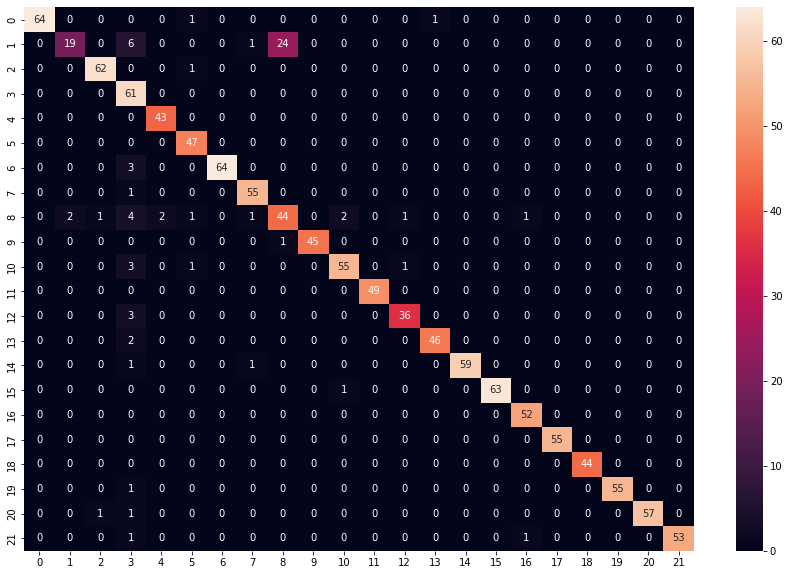

In [14]:
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True)
plt.show()

In [15]:
def predict(text):
     x = cv.transform([text]).toarray() # converting text to bag of words model (Vector)
     lang = model.predict(x) # predicting the language
     lang = le.inverse_transform(lang) # finding the language corresponding the the predicted value
     print("The langauge is in",lang[0])

In [16]:
predict("my name is zisun")

The langauge is in English


In [17]:
predict ("助けるが、今すぐバス")

The langauge is in Persian


In [18]:
predict ("เจริญกรุง")

The langauge is in Thai
